In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_wine = pd.read_csv('Https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'NonFlavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)

In [3]:
cov_mat = np.cov(x_train_std.T)
eigen_vals, eigen_vect = np.linalg.eig(cov_mat)

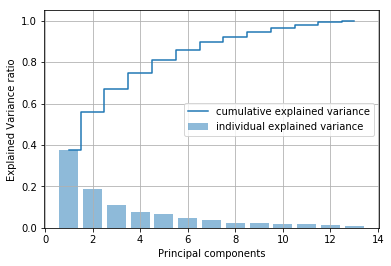

In [4]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where= 'mid', label = 'cumulative explained variance')
plt.ylabel('Explained Variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.grid()
plt.show()

# PCA in sklearn

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_region(x, y, classifier, resolution = 0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
    x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha = 0.04, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = x[y == cl, 0], y = x[y==cl, 1], alpha = 0.8, cmap = cmap(idx), marker = markers[idx], label = cl)

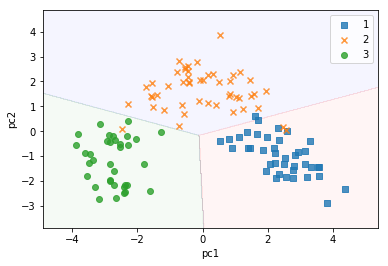

In [6]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components = 2)
lr = LogisticRegression()
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr.fit(x_train_pca, y_train)
plot_decision_region(x_train_pca, y_train, classifier = lr)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend(loc = 'best')
plt.show()

# LDA

In [14]:
from sklearn.lda import LDA
lda = LDA(n_components = 2)
x_train_lda = lda.fit_transform(x_train_std, y_train)

lr = LogisticRegression()
lr = lr.fit(x_train_lda, y_train)
plot_decision_region(x_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'best')
plt.show()

ModuleNotFoundError: No module named 'sklearn.lda'

ModuleNotFoundError: No module named 'sklearn.lda'